## datetime 오브젝트 사용하기

In [2]:
from datetime import datetime

In [3]:
now1 = datetime.now() 
print(now1)

2020-04-22 12:47:24.230768


In [4]:
now2 = datetime.today()
print(now2) 

2020-04-22 12:47:24.502686


In [5]:
t1 = datetime.now() 
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2020-04-22 12:47:24.864762
1970-01-01 00:00:00
1970-12-12 13:24:34


In [6]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

18374 days, 12:47:24.864762
<class 'datetime.timedelta'>


In [7]:
#datetime을 이용하면 계산할 수 있다는 것이 큰 장점
diff2 = t2 - t1

print(diff2)
print(type(diff2))

-18375 days, 11:12:35.135238
<class 'datetime.timedelta'>



## 문자열을 datetime 오브젝트로 변환하기

In [25]:
import pandas as pd 
import os
ebola = pd.read_csv(r"C:\Users\Hyunjung\ESAA\4월 20일 세션\country_timeseries.csv")

In [26]:
print(ebola.info()) #이 중 Date 변수에 집중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.3+ KB
None


In [27]:
#문자열로 되어있던 type
ebola['Date'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.3 KB
None


In [28]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [29]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03



## 시계열 데이터를 구분해서 추출

In [32]:
now = datetime.now()
print(now)

2020-04-22 12:48:19.480191


In [33]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2020-04-22


In [34]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime) 

12:48:19


In [35]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime) 

2020-04-22 12:48:19


## datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

In [36]:
ebola['Date']=pd.to_datetime(ebola['Date'])


## datetime 오브젝트에서 날짜 정보 추출하기

In [37]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])

In [38]:
#list 를 date time 형태로 변환하기.
d1 = pd.to_datetime(date_series)

In [39]:
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [40]:
print(d1[0].year)

2018


In [41]:
print(d1[0].month)

5


In [42]:
print(d1[0].day)

16


In [44]:
#위에서 불러들인 ebola 자료에서 date변수를 활용해 새로운 column year로 만들어주기
ebola['year'] = ebola['Date'].apply(lambda x:x.year)

## dt 접근자로 간단하게 해결하기

In [45]:
print(ebola['Date'][3].year)

2015


In [46]:
print(ebola['Date'][3].month)

1


In [47]:
print(ebola['Date'].year) #error

AttributeError: 'Series' object has no attribute 'year'

In [48]:
ebola['Date'].dt.year #lambda를 사용하지 않아도 변환

0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: Date, Length: 122, dtype: int64

In [49]:
#dt 접근자를 활용해 ebola data에 month 만들어 주기
#새로운 변수는 반드시[]안에, 아니면 . 으로 이어도 괜찮
ebola['month']=ebola.Date.dt.month
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015,1
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015,1
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015,1
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015,1
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,2014,3
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3


In [50]:
#한꺼번에 생성하기
ebola['month2'], ebola['day2'] = (ebola.Date.dt.month,ebola.Date.dt.day)

In [51]:
ebola[['month2','day2']].head()

,month2,day2
0,1,5
1,1,4
2,1,3
3,1,2
4,12,31


In [52]:
print(ebola.info()) #year다시 시도해보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
year                   122 non-null int64
month                  122 non-null int64
month2                 122 non

## 에볼라 최초 발병일 계산하기

In [53]:
#ebola data 뒤에서 5행, 앞에서 5열 가져오기
ebola.iloc[-5:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [54]:
# 에볼라의 최초 발병일을 구하고 최초 발병일로부터 몇일 차이가 나는지를 outbreak_d column에 계산하여 넣기

ebola['outbreak_d'] = ebola.Date - ebola.Date.min()

In [55]:
print(ebola['Date'].min())
print(type(ebola['Date'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### 파산한 은행의 개수 계산하기

In [57]:
banks = pd.read_csv(r"C:\Users\Hyunjung\ESAA\4월 20일 세션\banklist.csv")
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [59]:
banks = pd.read_csv(r"C:\Users\Hyunjung\ESAA\4월 20일 세션\banklist.csv", parse_dates=[5, 6]) #parse_dates: closing date, updated date가 date 타입을 가짐
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [61]:
#은행 파산의 분기와, 연도를 계산해 closing_quarter, closing_year column에 저장하기
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

In [62]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [63]:
#각 연도의 분기별로 파산된 은행의 갯수 구하기
closing_year_quarter = banks.groupby(['closing_year','closing_quarter']).size()

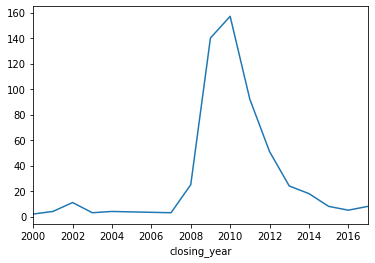

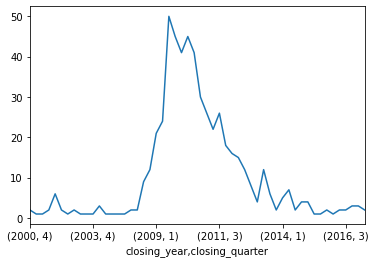

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = closing_year.plot() 
plt.show()

#fig, ax = plt.subplots() 
ax = closing_year_quarter.plot() 
plt.show()


## 테슬라 주식 데이터로 시간 계산하기

In [67]:
tesla = pd.read_csv(r"C:\Users\Hyunjung\ESAA\4월 20일 세션\tesla_stock_quandl.csv", parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
Date          1949 non-null datetime64[ns]
Open          1949 non-null float64
High          1949 non-null float64
Low           1949 non-null float64
Close         1949 non-null float64
Volume        1949 non-null float64
ExDividend    1949 non-null float64
SplitRatio    1949 non-null float64
AdjOpen       1949 non-null float64
AdjHigh       1949 non-null float64
AdjLow        1949 non-null float64
AdjClose      1949 non-null float64
AdjVolume     1949 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [68]:
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [ ]:
#2010년 6월에 해당하는 데이터만 가져오세요



## datetime 오브젝트를 인덱스로 설정하여 데이터 추출하기

In [ ]:
tesla.index = tesla['Date']
print(tesla.index)

In [ ]:
print(tesla['2015'].iloc[:5, :5])

In [ ]:
#index 를 활용하여 위와 같이 2010 6월 데이터를 앞에서부터 5번째 column까지 가져오기



## 시간 간격을 인덱스로 설정하여 데이터 추출하기

In [ ]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.head()

In [ ]:
tesla.index = tesla['ref_date']
tesla.iloc[:5, :5]

In [ ]:
tesla['5 days':].iloc[:5, :5]


## 시간 범위 생성하여 인덱스로 지정하기

In [69]:
ebola = pd.read_csv(r"C:\Users\Hyunjung\ESAA\4월 20일 세션\country_timeseries.csv", parse_dates=[0])
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [71]:
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [72]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05') #특정 범위 내의 데이터 저장
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [73]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)

print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0



## 시간 범위의 주기 설정하기

In [74]:
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')



## 에볼라의 확산 속도 비교하기

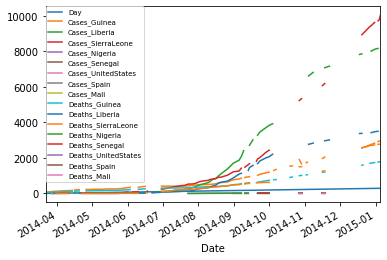

In [75]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots() #그래프 크기 키우기
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.) 
plt.show()

#None인 부분은 빈 형태로 나옴

In [76]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']] 
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


### 3. 그래프를 그리기 위한 데이터프레임 준비하기

In [79]:
ebola = pd.read_csv(r"C:\Users\Hyunjung\ESAA\4월 20일 세션\country_timeseries.csv",  parse_dates=['Date'])
print(ebola.head().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [80]:
#Date index 만들어 주기
ebola.index = ebola.Date #새로 변수를 만든 것이 아닌 단순한 데이터
ebola.index

DatetimeIndex(['2015-01-05', '2015-01-04', '2015-01-03', '2015-01-02',
               '2014-12-31', '2014-12-28', '2014-12-27', '2014-12-24',
               '2014-12-21', '2014-12-20',
               ...
               '2014-04-04', '2014-04-01', '2014-03-31', '2014-03-29',
               '2014-03-28', '2014-03-27', '2014-03-26', '2014-03-25',
               '2014-03-24', '2014-03-22'],
              dtype='datetime64[ns]', name='Date', length=122, freq=None)

In [81]:
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
new_idx

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [82]:
new_idx = reversed(new_idx)

In [83]:
ebola = ebola.reindex(new_idx)

In [84]:
ebola.head() #index가 잘 만들어진 것을 알 수 있음. 기존 Date의 NaT에는 index가 없기 때문에 재정의할 필요 있음

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


### 7. 각 나라의 에볼라 발병일을 같은 시점으로 옮겨 비교하기

In [91]:
#각 column별로 마지막 valid index 구하기
#None이 아닌 마지막 날짜를 last_valid에 저장
last_valid = ebola.apply(pd.Series.last_valid_index)

In [92]:
#각 나라별로 첫 valid index date 구하기
fisrt_valid = ebola.apply(pd.Series.first_valid_index)

In [93]:
earliest_date = ebola.index.min() 
print(earliest_date)

2014-03-22 00:00:00


In [94]:
#전세계적 최초 발병 날짜로부터 나라별 최초 발병 날짜까지의 일수 구하기
shift_values = last_valid - earliest_date
print(shift_values) #나라별로 며칠 뒤에 발병했는지 나옴

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [95]:
#각 나라의 최초 발병일을 동일하게 한 dataframe다시 만들기
ebola_dict = {}
for idx, col in enumerate(ebola): #ebola의 column을 index와 함께 반환
    d = shift_values[idx].days
    shifted = ebola[col].shift(d) 
    ebola_dict[col] = shifted #각 column을 빈 dict에 넣기
    

In [96]:
ebola_shift = pd.DataFrame(ebola_dict)

In [97]:
ebola_shift.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2014-03-26,2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-23,NaT,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [98]:
ebola_shift.index = ebola_shift['Day'] 
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)

ebola_shift.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


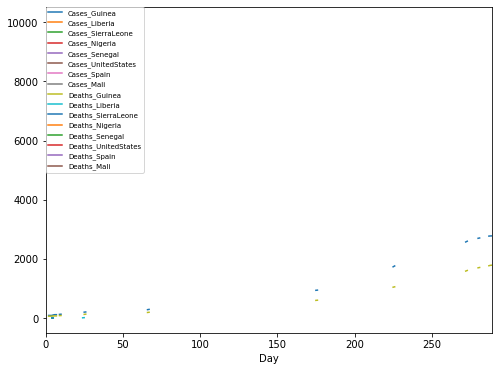

In [99]:
fig, ax = plt.subplots(figsize=(8,6)) 
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.) 

#plt.ylim(0,2000)
plt.show()